In [1]:
import matplotlib.pyplot as plt
import numpy as np

params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 16, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'font.size': 16, # was 10
    'legend.fontsize': 16, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
plt.rcParams.update(params)

In [2]:
True_Preds = np.load('True_Preds.npy')

# Means
NA_BLSTM_P_1 = np.load('NA_BLSTM_P_0_Mean.npy')
NA_BLSTM_P_2 = np.load('NA_BLSTM_P_1_Mean.npy')
NA_BLSTM_P_3 = np.load('NA_BLSTM_P_3_Mean.npy')
NA_BLSTM_P_4 = np.load('NA_BLSTM_P_5_Mean.npy')

# SD
NA_BLSTM_P_SD_1 = np.load('NA_BLSTM_P_0_SD.npy')
NA_BLSTM_P_SD_2 = np.load('NA_BLSTM_P_1_SD.npy')
NA_BLSTM_P_SD_3 = np.load('NA_BLSTM_P_3_SD.npy')
NA_BLSTM_P_SD_4 = np.load('NA_BLSTM_P_5_SD.npy')

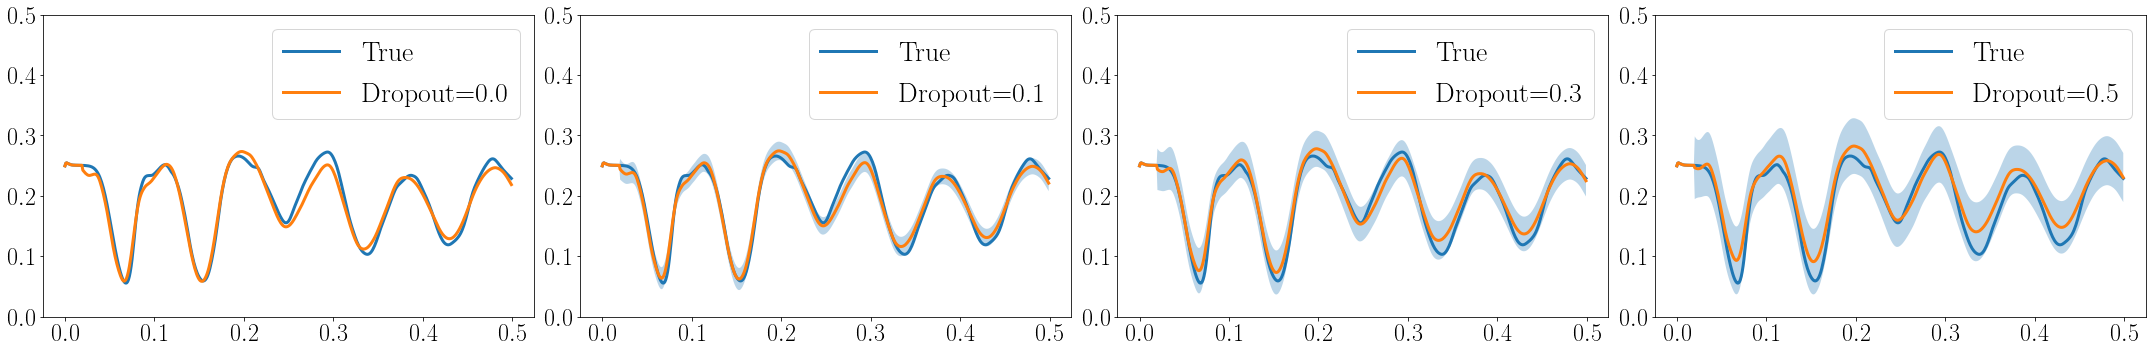

In [3]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(30,5))
time = 0.5/500*np.arange(500)

mode_num = 0
for i in range(4):    
    ax[i].plot(time,True_Preds[:,mode_num],label='True',linewidth=3,markersize=4)        
        

ax[0].plot(time,NA_BLSTM_P_1[0,mode_num,:],label='Dropout=0.0',linewidth=3,markersize=4)
ax[0].fill_between(np.arange(500)/500*0.5,NA_BLSTM_P_1[0,mode_num,:]+NA_BLSTM_P_SD_1[mode_num,:],NA_BLSTM_P_1[0,mode_num,:]-NA_BLSTM_P_SD_1[mode_num,:],alpha=0.3)

ax[1].plot(time,NA_BLSTM_P_2[0,mode_num,:],label='Dropout=0.1',linewidth=3,markersize=4)
ax[1].fill_between(np.arange(500)/500*0.5,NA_BLSTM_P_2[0,mode_num,:]+NA_BLSTM_P_SD_2[mode_num,:],NA_BLSTM_P_2[0,mode_num,:]-NA_BLSTM_P_SD_2[mode_num,:],alpha=0.3)

ax[2].plot(time,NA_BLSTM_P_3[0,mode_num,:],label='Dropout=0.3',linewidth=3,markersize=4)
ax[2].fill_between(np.arange(500)/500*0.5,NA_BLSTM_P_3[0,mode_num,:]+NA_BLSTM_P_SD_3[mode_num,:],NA_BLSTM_P_3[0,mode_num,:]-NA_BLSTM_P_SD_3[mode_num,:],alpha=0.3)

ax[3].plot(time,NA_BLSTM_P_4[0,mode_num,:],label='Dropout=0.5',linewidth=3,markersize=4)
ax[3].fill_between(np.arange(500)/500*0.5,NA_BLSTM_P_4[0,mode_num,:]+NA_BLSTM_P_SD_4[mode_num,:],NA_BLSTM_P_4[0,mode_num,:]-NA_BLSTM_P_SD_4[mode_num,:],alpha=0.3)


for i in range(4):
    ax[i].legend(loc='upper right',fontsize=28)
    ax[i].set_ylim((0.0,0.5))
    ax[i].tick_params(labelsize=24)


plt.tight_layout()
plt.savefig('Dropout_Study.png')
plt.show()

In [4]:
# Plot testing mses
na_blstm_p_error = np.mean((True_Preds[:,:]-np.transpose(NA_BLSTM_P_1[0,:-2,:]))**2)
print('NA BLSTM P 1 error:',na_blstm_p_error)

na_blstm_p_error = np.mean((True_Preds[:,:]-np.transpose(NA_BLSTM_P_2[0,:-2,:]))**2)
print('NA BLSTM P 2 error:',na_blstm_p_error)

na_blstm_p_error = np.mean((True_Preds[:,:]-np.transpose(NA_BLSTM_P_3[0,:-2,:]))**2)
print('NA BLSTM P 3 error:',na_blstm_p_error)

na_blstm_p_error = np.mean((True_Preds[:,:]-np.transpose(NA_BLSTM_P_4[0,:-2,:]))**2)
print('NA BLSTM P 4 error:',na_blstm_p_error)

NA BLSTM P 1 error: 0.0008199438955466343
NA BLSTM P 2 error: 0.0008261338753959205
NA BLSTM P 3 error: 0.0008518579477042715
NA BLSTM P 4 error: 0.0009274019621283387


In [5]:
# Plot testing rmses
na_blstm_p_error = np.var((True_Preds[:,:]-np.transpose(NA_BLSTM_P_1[0,:-2,:]))**2)
print('NA BLSTM P 1 var:',na_blstm_p_error)

na_blstm_p_error = np.var((True_Preds[:,:]-np.transpose(NA_BLSTM_P_2[0,:-2,:]))**2)
print('NA BLSTM P 2 var:',na_blstm_p_error)

na_blstm_p_error = np.var((True_Preds[:,:]-np.transpose(NA_BLSTM_P_3[0,:-2,:]))**2)
print('NA BLSTM P 3 var:',na_blstm_p_error)

na_blstm_p_error = np.var((True_Preds[:,:]-np.transpose(NA_BLSTM_P_4[0,:-2,:]))**2)
print('NA BLSTM P 4 var:',na_blstm_p_error)

NA BLSTM P 1 var: 5.613925444037132e-06
NA BLSTM P 2 var: 5.663860038399165e-06
NA BLSTM P 3 var: 5.7940436255151156e-06
NA BLSTM P 4 var: 6.117320991819089e-06
